In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [3]:
import yfinance as yf

In [5]:
# Load Apple stock
apple = yf.Ticker("AAPL")


In [11]:
# Income statement
income_stmt = apple.financials
print("Income Statement:\n", income_stmt)

Income Statement:
                                                         2024-09-30  \
Tax Effect Of Unusual Items                                    0.0   
Tax Rate For Calcs                                           0.241   
Normalized EBITDA                                   134661000000.0   
Net Income From Continuing Operation Net Minori...   93736000000.0   
Reconciled Depreciation                              11445000000.0   
Reconciled Cost Of Revenue                          210352000000.0   
EBITDA                                              134661000000.0   
EBIT                                                123216000000.0   
Net Interest Income                                            NaN   
Interest Expense                                               NaN   
Interest Income                                                NaN   
Normalized Income                                    93736000000.0   
Net Income From Continuing And Discontinued Ope...   93736000000.0   
T

In [13]:
# Balance sheet
balance_sheet = apple.balance_sheet
print("\nBalance Sheet:\n", balance_sheet)



Balance Sheet:
                                                       2024-09-30  \
Treasury Shares Number                                       NaN   
Ordinary Shares Number                             15116786000.0   
Share Issued                                       15116786000.0   
Net Debt                                           76686000000.0   
Total Debt                                        106629000000.0   
...                                                          ...   
Cash Cash Equivalents And Short Term Investments   65171000000.0   
Other Short Term Investments                       35228000000.0   
Cash And Cash Equivalents                          29943000000.0   
Cash Equivalents                                    2744000000.0   
Cash Financial                                     27199000000.0   

                                                      2023-09-30  \
Treasury Shares Number                                       0.0   
Ordinary Shares Number        

In [15]:
# Cash flow statement
cash_flow = apple.cashflow
print("\nCash Flow Statement:\n", cash_flow)


Cash Flow Statement:
                                                     2024-09-30  \
Free Cash Flow                                  108807000000.0   
Repurchase Of Capital Stock                     -94949000000.0   
Repayment Of Debt                                -9958000000.0   
Issuance Of Debt                                           0.0   
Issuance Of Capital Stock                                  NaN   
Capital Expenditure                              -9447000000.0   
Interest Paid Supplemental Data                            NaN   
Income Tax Paid Supplemental Data                26102000000.0   
End Cash Position                                29943000000.0   
Beginning Cash Position                          30737000000.0   
Changes In Cash                                   -794000000.0   
Financing Cash Flow                            -121983000000.0   
Cash Flow From Continuing Financing Activities -121983000000.0   
Net Other Financing Charges                      -580

In [17]:
# Apple Financial Data Analysis Project - Advanced Version

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Set visual style
sns.set(style="whitegrid")

In [21]:
# Load Apple stock data
ticker = yf.Ticker("AAPL")

In [23]:
# Get financial statements
income_stmt = ticker.financials
balance_sheet = ticker.balance_sheet
cash_flow = ticker.cashflow

In [25]:
# Transpose for easier handling
income_stmt = income_stmt.T
balance_sheet = balance_sheet.T
cash_flow = cash_flow.T

In [27]:
# Reset index
income_stmt.reset_index(inplace=True)
balance_sheet.reset_index(inplace=True)
cash_flow.reset_index(inplace=True)

In [29]:
# Rename date column
income_stmt.rename(columns={"index": "Date"}, inplace=True)
balance_sheet.rename(columns={"index": "Date"}, inplace=True)
cash_flow.rename(columns={"index": "Date"}, inplace=True)

In [31]:
# Convert date strings to datetime objects
income_stmt['Date'] = pd.to_datetime(income_stmt['Date'])
balance_sheet['Date'] = pd.to_datetime(balance_sheet['Date'])
cash_flow['Date'] = pd.to_datetime(cash_flow['Date'])

In [33]:
print(balance_sheet.columns.tolist())

['Date', 'Treasury Shares Number', 'Ordinary Shares Number', 'Share Issued', 'Net Debt', 'Total Debt', 'Tangible Book Value', 'Invested Capital', 'Working Capital', 'Net Tangible Assets', 'Capital Lease Obligations', 'Common Stock Equity', 'Total Capitalization', 'Total Equity Gross Minority Interest', 'Stockholders Equity', 'Gains Losses Not Affecting Retained Earnings', 'Other Equity Adjustments', 'Retained Earnings', 'Capital Stock', 'Common Stock', 'Total Liabilities Net Minority Interest', 'Total Non Current Liabilities Net Minority Interest', 'Other Non Current Liabilities', 'Tradeand Other Payables Non Current', 'Long Term Debt And Capital Lease Obligation', 'Long Term Capital Lease Obligation', 'Long Term Debt', 'Current Liabilities', 'Other Current Liabilities', 'Current Deferred Liabilities', 'Current Deferred Revenue', 'Current Debt And Capital Lease Obligation', 'Current Capital Lease Obligation', 'Current Debt', 'Other Current Borrowings', 'Commercial Paper', 'Payables And

In [35]:
df = pd.merge(income_stmt[['Date', 'Total Revenue', 'Net Income']],
              balance_sheet[['Date', 'Total Assets', 'Total Liabilities Net Minority Interest']],
              on='Date')

In [37]:
print(cash_flow.columns.tolist())

['Date', 'Free Cash Flow', 'Repurchase Of Capital Stock', 'Repayment Of Debt', 'Issuance Of Debt', 'Issuance Of Capital Stock', 'Capital Expenditure', 'Interest Paid Supplemental Data', 'Income Tax Paid Supplemental Data', 'End Cash Position', 'Beginning Cash Position', 'Changes In Cash', 'Financing Cash Flow', 'Cash Flow From Continuing Financing Activities', 'Net Other Financing Charges', 'Cash Dividends Paid', 'Common Stock Dividend Paid', 'Net Common Stock Issuance', 'Common Stock Payments', 'Common Stock Issuance', 'Net Issuance Payments Of Debt', 'Net Short Term Debt Issuance', 'Net Long Term Debt Issuance', 'Long Term Debt Payments', 'Long Term Debt Issuance', 'Investing Cash Flow', 'Cash Flow From Continuing Investing Activities', 'Net Other Investing Changes', 'Net Investment Purchase And Sale', 'Sale Of Investment', 'Purchase Of Investment', 'Net Business Purchase And Sale', 'Purchase Of Business', 'Net PPE Purchase And Sale', 'Purchase Of PPE', 'Operating Cash Flow', 'Cash F

In [41]:
df = pd.merge(df, cash_flow[['Date', 'Operating Cash Flow', 'Capital Expenditure']], on='Date')


In [45]:
df['Free Cash Flow'] = df['Operating Cash Flow'] - df['Capital Expenditure']


In [47]:
df.columns = df.columns.str.strip()  # optional cleanup

df['Net Profit Margin (%)'] = (df['Net Income'] / df['Total Revenue']) * 100
df['Debt to Asset Ratio'] = df['Total Liabilities Net Minority Interest'] / df['Total Assets']
df['Free Cash Flow'] = df['Operating Cash Flow'] - df['Capital Expenditure']


In [49]:
#final KPI DataFrame
print("\nKPI Summary Table:\n", df[['Date', 'Total Revenue', 'Net Income', 'Net Profit Margin (%)', 'Total Assets', 'Total Liabilities Net Minority Interest', 'Debt to Asset Ratio', 'Free Cash Flow']])



KPI Summary Table:
         Date   Total Revenue     Net Income Net Profit Margin (%)  \
0 2024-09-30  391035000000.0  93736000000.0             23.971256   
1 2023-09-30  383285000000.0  96995000000.0             25.306234   
2 2022-09-30  394328000000.0  99803000000.0             25.309641   
3 2021-09-30  365817000000.0  94680000000.0             25.881793   
4 2020-09-30             NaN            NaN                   NaN   

     Total Assets Total Liabilities Net Minority Interest Debt to Asset Ratio  \
0  364980000000.0                          308030000000.0            0.843964   
1  352583000000.0                          290437000000.0            0.823741   
2  352755000000.0                          302083000000.0            0.856354   
3  351002000000.0                          287912000000.0            0.820257   
4             NaN                                     NaN                 NaN   

   Free Cash Flow  
0  127701000000.0  
1  121502000000.0  
2  132859000000.0

C:\Users\Niharika\AppData\Local\Temp\ipykernel_21444\1576666247.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Date', y='Net Income', palette='Blues_d')


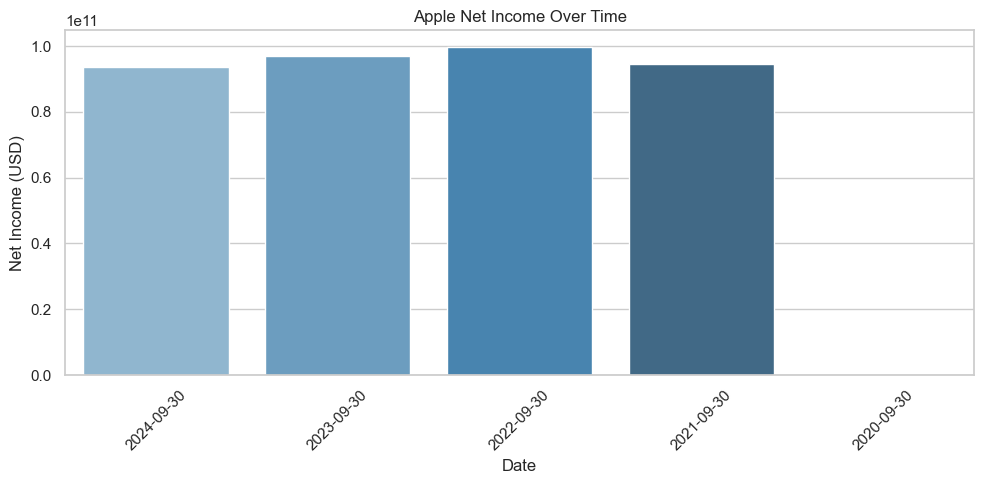

In [51]:
# Plot Net Income
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='Date', y='Net Income', palette='Blues_d')
plt.title('Apple Net Income Over Time')
plt.ylabel('Net Income (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

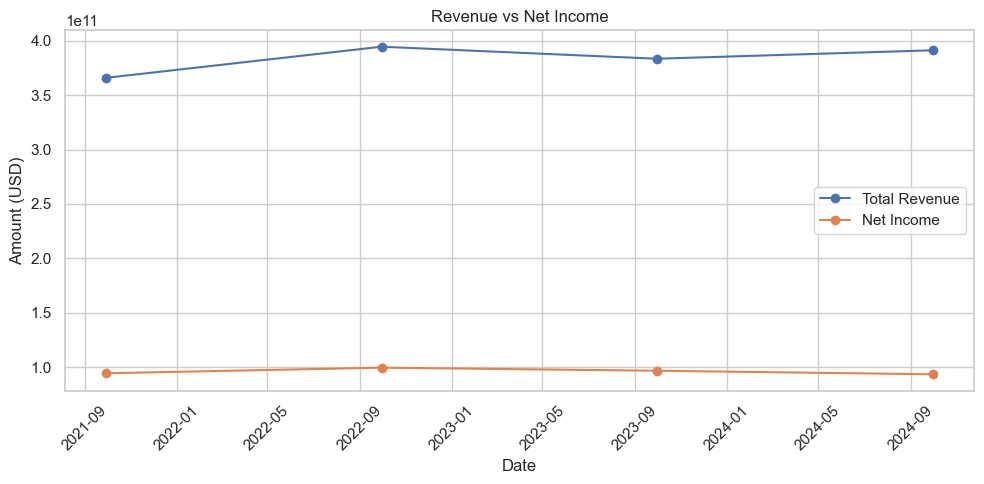

In [53]:
# Plot Revenue vs Net Income
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Total Revenue'], marker='o', label='Total Revenue')
plt.plot(df['Date'], df['Net Income'], marker='o', label='Net Income')
plt.title('Revenue vs Net Income')
plt.xlabel('Date')
plt.ylabel('Amount (USD)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

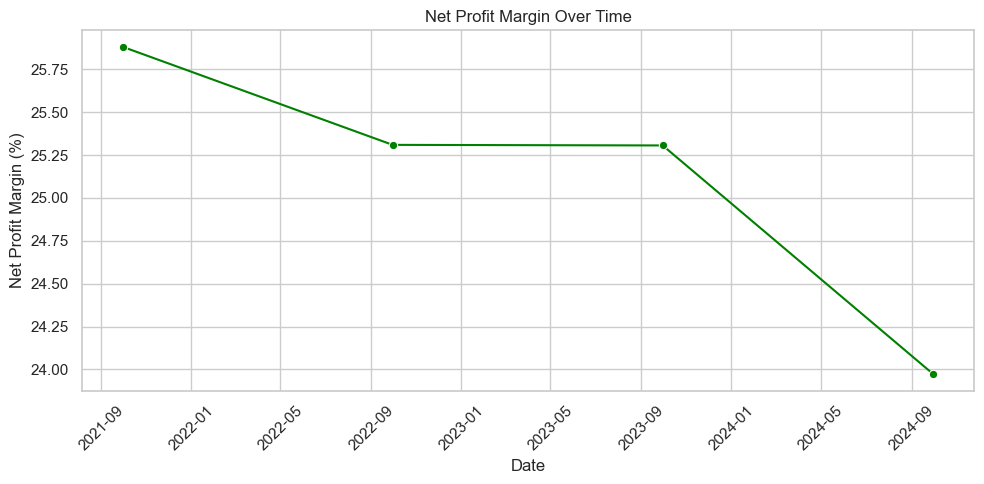

In [55]:
# Net Profit Margin
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='Date', y='Net Profit Margin (%)', marker='o', color='green')
plt.title('Net Profit Margin Over Time')
plt.ylabel('Net Profit Margin (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

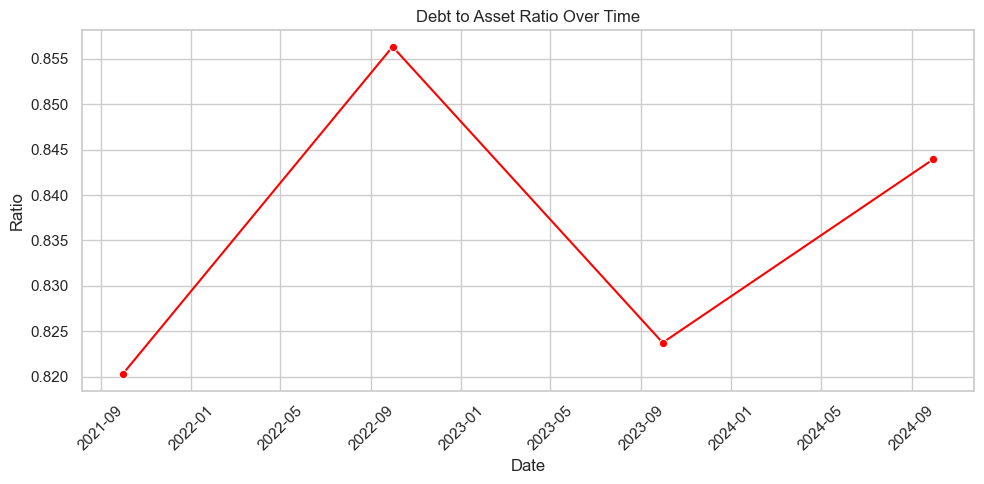

In [57]:
# Debt to Asset Ratio
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='Date', y='Debt to Asset Ratio', marker='o', color='red')
plt.title('Debt to Asset Ratio Over Time')
plt.ylabel('Ratio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Niharika\AppData\Local\Temp\ipykernel_21444\2449460906.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Date', y='Free Cash Flow', palette='Purples_r')


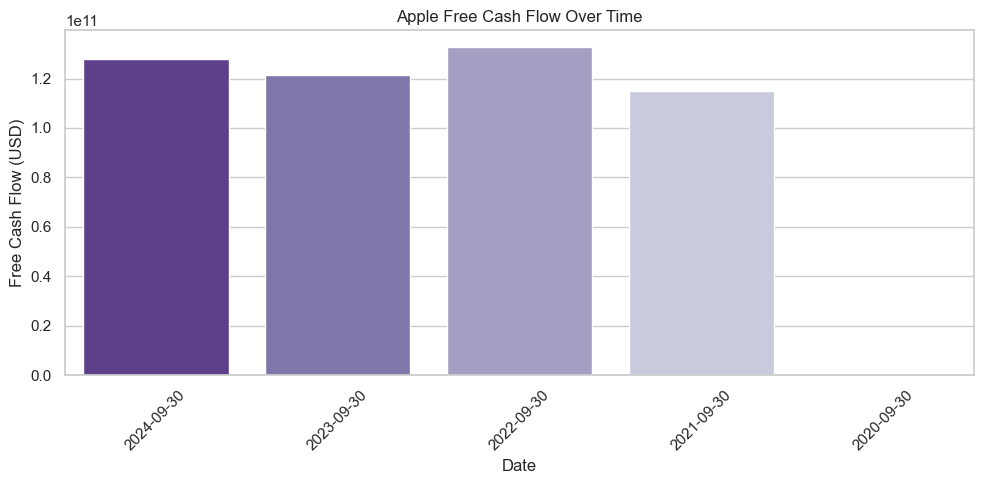

In [59]:
# Free Cash Flow
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='Date', y='Free Cash Flow', palette='Purples_r')
plt.title('Apple Free Cash Flow Over Time')
plt.ylabel('Free Cash Flow (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()